In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import numpy.random as rnd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(41)

In [2]:
#Construct a dataset with noise
m = 30 #number of data points
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_new=np.linspace(-3, 3, 500).reshape(-1, 1)

In [3]:
#Set hyperparamters
degree = 20
alpha = 0.1
l1_ratio= 0.1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


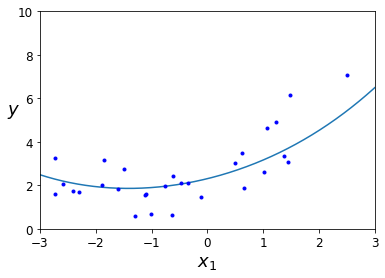

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
elasticnet_reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

#construct a Pipeline for the regression task
polynomial_regression = Pipeline((
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("elasticnet_reg", elasticnet_reg),
        ))
polynomial_regression.fit(X, y)

#use the model to build a line with the continous dataset
y_predict = polynomial_regression.predict(X_new)
plt.plot(X_new, y_predict)

#plot the original data
plt.plot(X, y, "b.", linewidth=3)

plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()